In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Leemos el dataset y valores perdidos "?"
### Elimino columnas Unnamed y numeros de serie

In [2]:
na_values = ["Nan"]
#datos = pd.read_csv("X:/Documentos/Formacion/MBIG/ProjectoJamones/cerditos.csv", encoding = "utf-8", na_values= na_values)
datos = pd.read_csv("X:/Documentos/Formacion/MBIG/ProjectoJamones/Datos_oleicos.csv", delimiter=',', encoding = "utf-8", na_values= na_values)
pd.options.display.max_columns = None
datos.head(10)
datos.drop(columns=['NumeroSerieLc'], axis=1, inplace=True)
datos

,TipoArticulo,Anhada,Partida,Raza,Alimentacion,AcidoOleico,AcidoPalmitico,AcidoEstearico,AcidoLinoleico,PesoVarios,Pesovientres,PesoCerdos,PesoNetoCanal,Nacimiento,CodigoMatadero,NroAnimales,PesoEntrada,TipoPesada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida
0,Paleta,2013,677,IBERICO,BELLOTA,53.96,19.92,9.89,9.89,11788.698,21870.1,26660.00,21432.698,01/04/2011,1,139,9.381295,Grupal,NaN,PALETA IBÉRCIA BELLOTA D. O. 2013,2013-02-21 00:00:00.000,2015-08-31 00:00:00.000
1,Jamón,2014,976,IBERICO,BELLOTA,53.84,21.16,10.32,8.31,8634.476,16286.2,20140.00,15960.476,19/02/2012,1,114,13.627193,Grupal,9.500,JAMON DE BELLOTA IBÉRICO RESERVA ESPECIAL,2014-03-17 00:00:00.000,2017-11-22 00:00:00.000
2,Jamón,2013,737,IBERICO PURO,CEBO,52.08,23.38,11.71,5.83,7016.840,12408.0,14920.00,12159.840,NaN,1,95,11.215789,Grupal,8.444,JAMON IBERICO CEBO,2013-02-27 00:00:00.000,2016-04-07 00:00:00.000
3,Paleta,2013,677,IBERICO,BELLOTA,53.96,19.92,9.89,9.89,11788.698,21870.1,26660.00,21432.698,01/04/2011,1,139,9.381295,Grupal,2.696,PALETA IB.BELLOTA D.O. DESH.,2013-02-21 00:00:00.000,2015-06-16 00:00:00.000
4,Paleta,2013,677,IBERICO,BELLOTA,53.96,19.92,9.89,9.89,11788.698,21870.1,26660.00,21432.698,01/04/2011,1,139,9.381295,Grupal,2.696,PALETA IB.BELLOTA D.O. DESH.,2013-02-21 00:00:00.000,2015-06-16 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34153,Jamón,2015,236,50% IBERICO,BELLOTA,54.20,20.10,9.40,9.70,2172.020,4549.0,5952.61,4458.020,20/10/2013,1,34,14.132353,Grupal,7.958,JAMON DE BELLOTA IBÉRICO,2015-01-15 00:00:00.000,2018-07-02 00:00:00.000
34154,Jamón,2015,236,50% IBERICO,BELLOTA,54.20,20.10,9.40,9.70,2172.020,4549.0,5952.61,4458.020,20/10/2013,1,34,14.132353,Grupal,7.550,JAMON DE BELLOTA IBÉRICO,2015-01-15 00:00:00.000,2018-07-02 00:00:00.000
34155,Jamón,2015,333,50% IBERICO,BELLOTA,52.70,21.10,11.30,8.20,2006.762,3706.9,4493.00,3632.762,10/04/2013,1,0,13.440000,Grupal,9.410,JAMON DE BELLOTA IBÉRICO,2015-01-20 00:00:00.000,2018-02-06 00:00:00.000
34156,Jamón,2015,333,50% IBERICO,BELLOTA,52.70,21.10,11.30,8.20,2006.762,3706.9,4493.00,3632.762,10/04/2013,1,0,13.440000,Grupal,8.225,JAMON DE BELLOTA IBERICO PASSION,2015-01-20 00:00:00.000,2019-05-14 00:00:00.000


### Dimensiones de conjunto de Datos

In [3]:
print("Dimension dataset:", (datos.shape))
print()
datos.info()

Dimension dataset: (34158, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34158 entries, 0 to 34157
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TipoArticulo         34158 non-null  object 
 1   Anhada               34158 non-null  int64  
 2   Partida              34158 non-null  int64  
 3   Raza                 34158 non-null  object 
 4   Alimentacion         34158 non-null  object 
 5   AcidoOleico          34158 non-null  float64
 6   AcidoPalmitico       34158 non-null  float64
 7   AcidoEstearico       34158 non-null  float64
 8   AcidoLinoleico       34158 non-null  float64
 9   PesoVarios           34158 non-null  float64
 10  Pesovientres         34158 non-null  float64
 11  PesoCerdos           34158 non-null  float64
 12  PesoNetoCanal        34158 non-null  float64
 13  Nacimiento           30444 non-null  object 
 14  CodigoMatadero       34158 non-null  int64  
 15  NroA

### Reviso valores null


In [4]:
sns.set(rc ={"figure.figsize":(15,8)})

print(datos.isna().sum().sum())
print(datos.isnull().sum().sum())
print(datos.isna().sum())

6078
6078
TipoArticulo              0
Anhada                    0
Partida                   0
Raza                      0
Alimentacion              0
AcidoOleico               0
AcidoPalmitico            0
AcidoEstearico            0
AcidoLinoleico            0
PesoVarios                0
Pesovientres              0
PesoCerdos                0
PesoNetoCanal             0
Nacimiento             3714
CodigoMatadero            0
NroAnimales               0
PesoEntrada               0
TipoPesada                0
PesoSalida             2361
DescripcionArticulo       3
FechaEntrada              0
FechaSalida               0
dtype: int64


<AxesSubplot:>

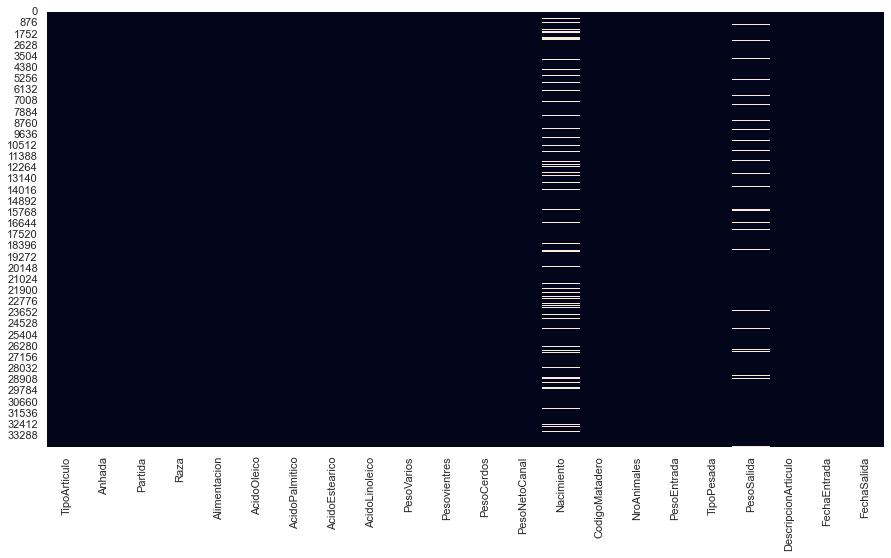

In [5]:
sns.heatmap(datos.isnull(),cbar=False)

# Elimino Fechas dobles y datos faltantes 


In [6]:
datos = datos.drop(datos[datos['Nacimiento'].str.len()>10].index)
datos = datos.drop(datos[datos['Nacimiento'].isna()].index)
datos = datos.drop(datos[datos['PesoSalida'].isna()].index)

In [10]:
datos

,TipoArticulo,Anhada,Partida,Raza,Alimentacion,AcidoOleico,AcidoPalmitico,AcidoEstearico,AcidoLinoleico,PesoVarios,Pesovientres,PesoCerdos,PesoNetoCanal,Nacimiento,CodigoMatadero,NroAnimales,PesoEntrada,TipoPesada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida
1,Jamón,2014,976,IBERICO,BELLOTA,53.84,21.16,10.32,8.31,8634.476,16286.2,20140.00,15960.476,19/02/2012,1,114,13.627193,Grupal,9.500,JAMON DE BELLOTA IBÉRICO RESERVA ESPECIAL,2014-03-17 00:00:00.000,2017-11-22 00:00:00.000
3,Paleta,2013,677,IBERICO,BELLOTA,53.96,19.92,9.89,9.89,11788.698,21870.1,26660.00,21432.698,01/04/2011,1,139,9.381295,Grupal,2.696,PALETA IB.BELLOTA D.O. DESH.,2013-02-21 00:00:00.000,2015-06-16 00:00:00.000
4,Paleta,2013,677,IBERICO,BELLOTA,53.96,19.92,9.89,9.89,11788.698,21870.1,26660.00,21432.698,01/04/2011,1,139,9.381295,Grupal,2.696,PALETA IB.BELLOTA D.O. DESH.,2013-02-21 00:00:00.000,2015-06-16 00:00:00.000
5,Paleta,2013,559,IBERICO,BELLOTA,54.01,20.11,9.41,10.04,10868.090,20180.7,25000.00,19777.090,16/10/2011,1,140,8.664286,Grupal,3.092,PALETA IB.BELLOTA D.O. DESH.,2013-02-11 00:00:00.000,2015-06-16 00:00:00.000
7,Paleta,2013,559,IBERICO,BELLOTA,54.01,20.11,9.41,10.04,10868.090,20180.7,25000.00,19777.090,16/10/2011,1,140,8.664286,Grupal,2.900,PALETA IB.BELLOTA D.O. DESH.,2013-02-11 00:00:00.000,2015-06-16 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34153,Jamón,2015,236,50% IBERICO,BELLOTA,54.20,20.10,9.40,9.70,2172.020,4549.0,5952.61,4458.020,20/10/2013,1,34,14.132353,Grupal,7.958,JAMON DE BELLOTA IBÉRICO,2015-01-15 00:00:00.000,2018-07-02 00:00:00.000
34154,Jamón,2015,236,50% IBERICO,BELLOTA,54.20,20.10,9.40,9.70,2172.020,4549.0,5952.61,4458.020,20/10/2013,1,34,14.132353,Grupal,7.550,JAMON DE BELLOTA IBÉRICO,2015-01-15 00:00:00.000,2018-07-02 00:00:00.000
34155,Jamón,2015,333,50% IBERICO,BELLOTA,52.70,21.10,11.30,8.20,2006.762,3706.9,4493.00,3632.762,10/04/2013,1,0,13.440000,Grupal,9.410,JAMON DE BELLOTA IBÉRICO,2015-01-20 00:00:00.000,2018-02-06 00:00:00.000
34156,Jamón,2015,333,50% IBERICO,BELLOTA,52.70,21.10,11.30,8.20,2006.762,3706.9,4493.00,3632.762,10/04/2013,1,0,13.440000,Grupal,8.225,JAMON DE BELLOTA IBERICO PASSION,2015-01-20 00:00:00.000,2019-05-14 00:00:00.000


In [11]:
datos.shape

(27579, 22)

<AxesSubplot:>

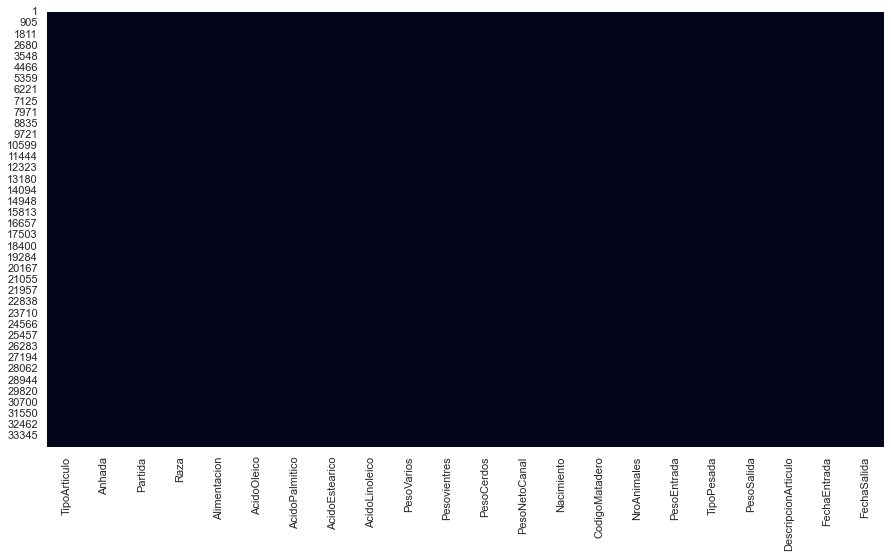

In [9]:
sns.heatmap(datos.isnull(),cbar=False)


### Reviso Duplicados

In [12]:
print(datos.duplicated().sum().sum())
dups = datos.duplicated()
# Miramos si hay duplicados
print('Algun duplicado? {}'.format(dups.any()))
print()
print('Registros duplicados: \n{}'.format(datos[dups]))
print()


12026
Algun duplicado? True

Registros duplicados: 
      TipoArticulo  Anhada  Partida          Raza Alimentacion  AcidoOleico  \
4           Paleta    2013      677       IBERICO      BELLOTA        53.96   
23           Jamón    2016     1427   50% IBERICO      BELLOTA        55.54   
24           Jamón    2016     1427   50% IBERICO      BELLOTA        55.54   
25           Jamón    2016     1427   50% IBERICO      BELLOTA        55.54   
26           Jamón    2016     1427   50% IBERICO      BELLOTA        55.54   
...            ...     ...      ...           ...          ...          ...   
34146        Jamón    2015      334   50% IBERICO      BELLOTA        52.80   
34152        Jamón    2014      299       IBERICO      BELLOTA        54.50   
34153        Jamón    2015      236   50% IBERICO      BELLOTA        54.20   
34155        Jamón    2015      333   50% IBERICO      BELLOTA        52.70   
34157       Paleta    2014      447  IBERICO PURO      BELLOTA        55.88   


### Datos unicos por columna

In [13]:
counts = datos.nunique()
counts

TipoArticulo              2
Anhada                    7
Partida                 102
Raza                      5
Alimentacion              2
AcidoOleico              89
AcidoPalmitico           91
AcidoEstearico           83
AcidoLinoleico           88
PesoVarios              103
Pesovientres            103
PesoCerdos              102
PesoNetoCanal           103
Nacimiento               60
CodigoMatadero            1
NroAnimales              59
PesoEntrada             200
TipoPesada                2
PesoSalida             1763
DescripcionArticulo     169
FechaEntrada             69
FechaSalida            1082
dtype: int64

### Corregimos Valores duplicados o iguales con distinto nombre

In [14]:
datos['Raza'] = datos['Raza'].replace(datos[datos['Raza'].str.len()>10].index)

datos['Raza'].replace(to_replace={'IBERICO': '50% IBERICO', 'IBERICO PURO': '100% IBERICO'}, inplace=True)
datos['Raza'].unique()

array(['50% IBERICO', '75% IBERICO', '100% IBERICO'], dtype=object)

In [ ]:
datos.info()

# Formatos de fechas y creamos el target1: tiempo de maduración

In [15]:
datos['FechaEntrada'] =  pd.to_datetime(datos['FechaEntrada'])
datos['FechaSalida'] =  pd.to_datetime(datos['FechaSalida'])
datos['Nacimiento'] =  pd.to_datetime(datos['Nacimiento'])

### Añadimos variable Edad de sacrificio

In [16]:
# PASO 5 CREAMOS COLUMNA EdadSacrificio CON FECHAS DE NACIMIENTO Y ENTRADA DE LA PIEZA

# EdadSacrificio EN DÍAS
datos['EdadSacrificio']= datos['FechaEntrada'] - datos['Nacimiento']
datos['EdadSacrificio']=datos['EdadSacrificio'].dt.days.astype(int)
datos['EdadSacrificio']



1        757
3        779
4        779
5        484
7        484
        ... 
34153    452
34154    452
34155    473
34156    473
34157    625
Name: EdadSacrificio, Length: 27579, dtype: int32

In [17]:
# EdadSacrificioMESES EN MESES
datos["EdadSacrificio_MESES"]=round(((datos['FechaEntrada'] - datos['Nacimiento']).dt.days)/30.41).astype(int)
datos["EdadSacrificio_MESES"]

1        25
3        26
4        26
5        16
7        16
         ..
34153    15
34154    15
34155    16
34156    16
34157    21
Name: EdadSacrificio_MESES, Length: 27579, dtype: int32

## Target1: T_Maduracion

In [18]:
from datetime import datetime as dt

datos["T_Maduracion"]= (datos['FechaSalida']-datos['FechaEntrada'])
datos["T_Maduracion"]= datos['T_Maduracion'].dt.days.astype(int)
datos["T_Maduracion"]



1        1346
3         845
4         845
5         855
7         855
         ... 
34153    1264
34154    1264
34155    1113
34156    1575
34157    1066
Name: T_Maduracion, Length: 27579, dtype: int32

In [19]:
# TiempoMaduracionMESES EN MESES
datos["T_Maduracion_MESES"]=round(((datos['FechaSalida']-datos['FechaEntrada']).dt.days)/30.41).astype(int)
datos["T_Maduracion_MESES"]

1        44
3        28
4        28
5        28
7        28
         ..
34153    42
34154    42
34155    37
34156    52
34157    35
Name: T_Maduracion_MESES, Length: 27579, dtype: int32

In [20]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27579 entries, 1 to 34157
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TipoArticulo          27579 non-null  object        
 1   Anhada                27579 non-null  int64         
 2   Partida               27579 non-null  int64         
 3   Raza                  27579 non-null  object        
 4   Alimentacion          27579 non-null  object        
 5   AcidoOleico           27579 non-null  float64       
 6   AcidoPalmitico        27579 non-null  float64       
 7   AcidoEstearico        27579 non-null  float64       
 8   AcidoLinoleico        27579 non-null  float64       
 9   PesoVarios            27579 non-null  float64       
 10  Pesovientres          27579 non-null  float64       
 11  PesoCerdos            27579 non-null  float64       
 12  PesoNetoCanal         27579 non-null  float64       
 13  Nacimiento      

In [21]:
datos.describe()

,Anhada,Partida,AcidoOleico,AcidoPalmitico,AcidoEstearico,AcidoLinoleico,PesoVarios,Pesovientres,PesoCerdos,PesoNetoCanal,CodigoMatadero,NroAnimales,PesoEntrada,PesoSalida,EdadSacrificio,EdadSacrificio_MESES,T_Maduracion,T_Maduracion_MESES
count,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.0,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000,27579.000000
mean,2014.634686,1630.752420,54.464279,20.385347,9.588212,9.181170,7813.656548,14440.339842,17639.061744,14151.533102,1.0,96.945575,11.060707,9.461121,587.632583,19.302041,1182.962290,38.896951
std,1.054200,14006.997034,1.416876,0.840077,0.926305,0.957315,2730.082946,5133.921672,6300.961660,5031.243303,0.0,38.124823,2.518685,156.811061,129.217298,4.323576,330.085285,10.856826
min,2013.000000,3.000000,50.200000,18.550000,7.330000,5.700000,131.590000,245.500000,328.890000,240.590000,1.0,0.000000,6.325833,0.000000,-272.000000,-9.000000,45.000000,1.000000
25%,2014.000000,375.000000,53.630000,19.810000,8.920000,8.430000,6393.206000,11232.000000,13456.000000,11007.360000,1.0,70.000000,8.623894,3.150000,484.000000,16.000000,924.000000,30.000000
50%,2015.000000,677.000000,54.330000,20.360000,9.610000,9.150000,8640.048000,16286.200000,20020.000000,15960.476000,1.0,106.000000,11.414286,6.040000,603.000000,20.000000,1131.000000,37.000000
75%,2015.000000,870.000000,55.500000,20.760000,10.080000,9.890000,9744.046000,18531.100000,23020.000000,18160.478000,1.0,130.000000,13.363636,8.505000,688.000000,23.000000,1408.000000,46.000000
max,2021.000000,211290.000000,59.060000,23.040000,12.400000,12.010000,11997.620000,21870.100000,26660.000000,21432.698000,1.0,140.000000,17.150000,7524.000000,908.000000,30.000000,2608.000000,86.000000


In [22]:
counts = datos.nunique()
counts

TipoArticulo               2
Anhada                     7
Partida                  102
Raza                       3
Alimentacion               2
AcidoOleico               89
AcidoPalmitico            91
AcidoEstearico            83
AcidoLinoleico            88
PesoVarios               103
Pesovientres             103
PesoCerdos               102
PesoNetoCanal            103
Nacimiento                60
CodigoMatadero             1
NroAnimales               59
PesoEntrada              200
TipoPesada                 2
PesoSalida              1763
DescripcionArticulo      169
FechaEntrada              69
FechaSalida             1082
EdadSacrificio            88
EdadSacrificio_MESES      15
T_Maduracion            1388
T_Maduracion_MESES        76
dtype: int64

### Primera tabla de correlaciones - para variables númericas

<AxesSubplot:>

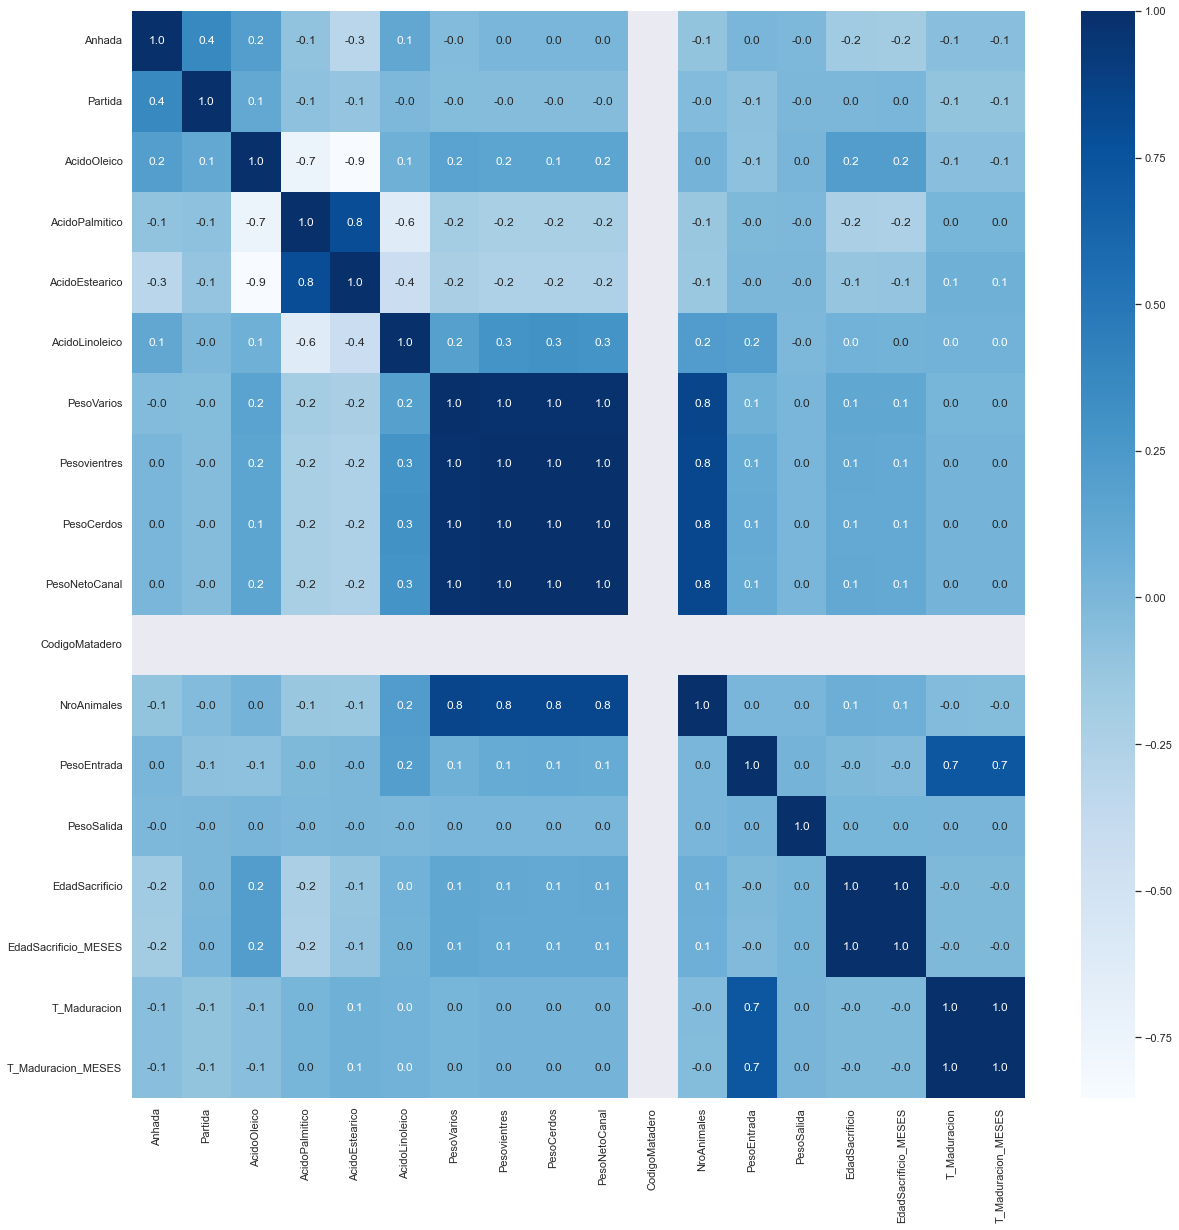

In [23]:
correlation_matrix = (datos).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')

### Veo que los pesos y los acidos tienen ciertas correlaciones entre si, solo tienen 0,1 de correlación con el tiempode maduración los acidos: "Oleico, Estearico" y el peso de Entrada que si tiene un 0,7  de correlación con el tiempo de maduración 

### El peso de salida y la edad de sacrificio tiene 0 correlación 

y solo tenemos 1 código de matadero

### Eliminamos variables que su correlacion es 0 con el tiempo de maduración 


In [24]:
eliminar = ["Anhada","AcidoPalmitico","AcidoLinoleico","PesoVarios","Pesovientres","PesoCerdos","PesoNetoCanal",
            "CodigoMatadero","NroAnimales"]
for columnas in eliminar:
    datos.drop(columnas, axis=1, inplace=True)

In [25]:
datos

,TipoArticulo,Partida,Raza,Alimentacion,AcidoOleico,AcidoEstearico,Nacimiento,PesoEntrada,TipoPesada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida,EdadSacrificio,EdadSacrificio_MESES,T_Maduracion,T_Maduracion_MESES
1,Jamón,976,50% IBERICO,BELLOTA,53.84,10.32,2012-02-19,13.627193,Grupal,9.500,JAMON DE BELLOTA IBÉRICO RESERVA ESPECIAL,2014-03-17,2017-11-22,757,25,1346,44
3,Paleta,677,50% IBERICO,BELLOTA,53.96,9.89,2011-01-04,9.381295,Grupal,2.696,PALETA IB.BELLOTA D.O. DESH.,2013-02-21,2015-06-16,779,26,845,28
4,Paleta,677,50% IBERICO,BELLOTA,53.96,9.89,2011-01-04,9.381295,Grupal,2.696,PALETA IB.BELLOTA D.O. DESH.,2013-02-21,2015-06-16,779,26,845,28
5,Paleta,559,50% IBERICO,BELLOTA,54.01,9.41,2011-10-16,8.664286,Grupal,3.092,PALETA IB.BELLOTA D.O. DESH.,2013-02-11,2015-06-16,484,16,855,28
7,Paleta,559,50% IBERICO,BELLOTA,54.01,9.41,2011-10-16,8.664286,Grupal,2.900,PALETA IB.BELLOTA D.O. DESH.,2013-02-11,2015-06-16,484,16,855,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34153,Jamón,236,50% IBERICO,BELLOTA,54.20,9.40,2013-10-20,14.132353,Grupal,7.958,JAMON DE BELLOTA IBÉRICO,2015-01-15,2018-07-02,452,15,1264,42
34154,Jamón,236,50% IBERICO,BELLOTA,54.20,9.40,2013-10-20,14.132353,Grupal,7.550,JAMON DE BELLOTA IBÉRICO,2015-01-15,2018-07-02,452,15,1264,42
34155,Jamón,333,50% IBERICO,BELLOTA,52.70,11.30,2013-10-04,13.440000,Grupal,9.410,JAMON DE BELLOTA IBÉRICO,2015-01-20,2018-02-06,473,16,1113,37
34156,Jamón,333,50% IBERICO,BELLOTA,52.70,11.30,2013-10-04,13.440000,Grupal,8.225,JAMON DE BELLOTA IBERICO PASSION,2015-01-20,2019-05-14,473,16,1575,52


In [26]:
counts = datos.nunique()
counts

TipoArticulo               2
Partida                  102
Raza                       3
Alimentacion               2
AcidoOleico               89
AcidoEstearico            83
Nacimiento                60
PesoEntrada              200
TipoPesada                 2
PesoSalida              1763
DescripcionArticulo      169
FechaEntrada              69
FechaSalida             1082
EdadSacrificio            88
EdadSacrificio_MESES      15
T_Maduracion            1388
T_Maduracion_MESES        76
dtype: int64

### Detección de Outliers - por el momento lo dejamos aparcado

### ONE HOT ENCODER- codificación variables categóricas

In [27]:
# PASO 7 ONE_HOT_ENCODER A VARIABLES CON MENOS DE 10 CLASES

#VAMOS A HACER CREAR UN DATASET ONE_HOT_ENCODER APLICANDO EL ONE_HOT A TODAS LAS CATEGORÍAS QUE 
#TENGAN MENOS DE 11 CATEGORÍAS
datos_cod = datos.copy()


#Lista de número de categorías distintas del dataSet original
uvs = datos.nunique().tolist()

#Apuntaré en las siguientes dos listas los índices de las columnas de tengan menos y mas/igual de 5 categorías
ncol = []
ncolinv = []
#Con el bucle relleno ambas listas
c = 0
for i in uvs:
    if i<=5:
        ncol.append(c)
    else:
        ncolinv.append(c)
    c+=1

#DataSet con variables de menos de 11 categorías
datos_codA=datos_cod.iloc[:,ncol]

#DataSet con variables de mas de 10 categorías
datos_codB=datos_cod.iloc[:,ncolinv]
    
#Defino el ONE_HOT_ENCODER casero que hemos fabricado para no cargarnos el dataframe
def createDummies(df, var_name):
    dummy =pd.get_dummies(df[var_name])
    df=df.drop(var_name,axis=1)
    df=pd.concat([df,dummy],axis=1)
    return(df)
    
#Debido a que esta pensado para usarse con objects o strings hago la transformación pertinente
listcol = datos_codA.columns.tolist()
datos_codA = datos_codA.astype(str)

#Aplico el ONE_HOT_ENCODER casero al dataSet de menos de 11 categorías
datos_codA = createDummies(datos_codA, listcol)

#Concateno el dataSet que tiene variables con mas de 11 categorías
datos_OneH = pd.concat([datos_codA,datos_codB], axis = 1)
    

datos_OneH

,TipoArticulo_Jamón,TipoArticulo_Paleta,Raza_100% IBERICO,Raza_50% IBERICO,Raza_75% IBERICO,Alimentacion_BELLOTA,Alimentacion_CEBO DE CAMPO,TipoPesada_Grupal,TipoPesada_Individual,Partida,AcidoOleico,AcidoEstearico,Nacimiento,PesoEntrada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida,EdadSacrificio,EdadSacrificio_MESES,T_Maduracion,T_Maduracion_MESES
1,1,0,0,1,0,1,0,1,0,976,53.84,10.32,2012-02-19,13.627193,9.500,JAMON DE BELLOTA IBÉRICO RESERVA ESPECIAL,2014-03-17,2017-11-22,757,25,1346,44
3,0,1,0,1,0,1,0,1,0,677,53.96,9.89,2011-01-04,9.381295,2.696,PALETA IB.BELLOTA D.O. DESH.,2013-02-21,2015-06-16,779,26,845,28
4,0,1,0,1,0,1,0,1,0,677,53.96,9.89,2011-01-04,9.381295,2.696,PALETA IB.BELLOTA D.O. DESH.,2013-02-21,2015-06-16,779,26,845,28
5,0,1,0,1,0,1,0,1,0,559,54.01,9.41,2011-10-16,8.664286,3.092,PALETA IB.BELLOTA D.O. DESH.,2013-02-11,2015-06-16,484,16,855,28
7,0,1,0,1,0,1,0,1,0,559,54.01,9.41,2011-10-16,8.664286,2.900,PALETA IB.BELLOTA D.O. DESH.,2013-02-11,2015-06-16,484,16,855,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34153,1,0,0,1,0,1,0,1,0,236,54.20,9.40,2013-10-20,14.132353,7.958,JAMON DE BELLOTA IBÉRICO,2015-01-15,2018-07-02,452,15,1264,42
34154,1,0,0,1,0,1,0,1,0,236,54.20,9.40,2013-10-20,14.132353,7.550,JAMON DE BELLOTA IBÉRICO,2015-01-15,2018-07-02,452,15,1264,42
34155,1,0,0,1,0,1,0,1,0,333,52.70,11.30,2013-10-04,13.440000,9.410,JAMON DE BELLOTA IBÉRICO,2015-01-20,2018-02-06,473,16,1113,37
34156,1,0,0,1,0,1,0,1,0,333,52.70,11.30,2013-10-04,13.440000,8.225,JAMON DE BELLOTA IBERICO PASSION,2015-01-20,2019-05-14,473,16,1575,52


In [28]:
from sklearn.preprocessing import OrdinalEncoder

# PASO 9 CODIFICAMOS CON ORDINAL ENCODER
codificar = ["DescripcionArticulo"]
for columnas in codificar:
    oe = OrdinalEncoder()
    datos_OneH[columnas] = oe.fit_transform(datos_OneH[[columnas]])

In [29]:
datos_OneH

,TipoArticulo_Jamón,TipoArticulo_Paleta,Raza_100% IBERICO,Raza_50% IBERICO,Raza_75% IBERICO,Alimentacion_BELLOTA,Alimentacion_CEBO DE CAMPO,TipoPesada_Grupal,TipoPesada_Individual,Partida,AcidoOleico,AcidoEstearico,Nacimiento,PesoEntrada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida,EdadSacrificio,EdadSacrificio_MESES,T_Maduracion,T_Maduracion_MESES
1,1,0,0,1,0,1,0,1,0,976,53.84,10.32,2012-02-19,13.627193,9.500,39.0,2014-03-17,2017-11-22,757,25,1346,44
3,0,1,0,1,0,1,0,1,0,677,53.96,9.89,2011-01-04,9.381295,2.696,154.0,2013-02-21,2015-06-16,779,26,845,28
4,0,1,0,1,0,1,0,1,0,677,53.96,9.89,2011-01-04,9.381295,2.696,154.0,2013-02-21,2015-06-16,779,26,845,28
5,0,1,0,1,0,1,0,1,0,559,54.01,9.41,2011-10-16,8.664286,3.092,154.0,2013-02-11,2015-06-16,484,16,855,28
7,0,1,0,1,0,1,0,1,0,559,54.01,9.41,2011-10-16,8.664286,2.900,154.0,2013-02-11,2015-06-16,484,16,855,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34153,1,0,0,1,0,1,0,1,0,236,54.20,9.40,2013-10-20,14.132353,7.958,23.0,2015-01-15,2018-07-02,452,15,1264,42
34154,1,0,0,1,0,1,0,1,0,236,54.20,9.40,2013-10-20,14.132353,7.550,23.0,2015-01-15,2018-07-02,452,15,1264,42
34155,1,0,0,1,0,1,0,1,0,333,52.70,11.30,2013-10-04,13.440000,9.410,23.0,2015-01-20,2018-02-06,473,16,1113,37
34156,1,0,0,1,0,1,0,1,0,333,52.70,11.30,2013-10-04,13.440000,8.225,21.0,2015-01-20,2019-05-14,473,16,1575,52


In [33]:
counts = datos_OneH.nunique()
counts

TipoArticulo_Jamón               2
TipoArticulo_Paleta              2
Raza_100% IBERICO                2
Raza_50% IBERICO                 2
Raza_75% IBERICO                 2
Alimentacion_BELLOTA             2
Alimentacion_CEBO DE CAMPO       2
TipoPesada_Grupal                2
TipoPesada_Individual            2
Partida                        102
AcidoOleico                     89
AcidoEstearico                  83
Nacimiento                      60
PesoEntrada                    200
PesoSalida                    1763
DescripcionArticulo            169
FechaEntrada                    69
FechaSalida                   1082
EdadSacrificio                  88
EdadSacrificio_MESES            15
T_Maduracion                  1388
T_Maduracion_MESES              76
dtype: int64

#### Estudio de Correlaciones

In [30]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos_OneH.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

,variable_1,variable_2,r,abs_r
98,T_Maduracion_MESES,T_Maduracion,0.999641,0.999641
89,T_Maduracion,T_Maduracion_MESES,0.999641,0.999641
67,EdadSacrificio,EdadSacrificio_MESES,0.997583,0.997583
76,EdadSacrificio_MESES,EdadSacrificio,0.997583,0.997583
12,AcidoOleico,AcidoEstearico,-0.853243,0.853243
21,AcidoEstearico,AcidoOleico,-0.853243,0.853243
35,PesoEntrada,DescripcionArticulo,-0.804380,0.804380
53,DescripcionArticulo,PesoEntrada,-0.804380,0.804380
83,T_Maduracion,PesoEntrada,0.722958,0.722958
38,PesoEntrada,T_Maduracion,0.722958,0.722958


<AxesSubplot:>

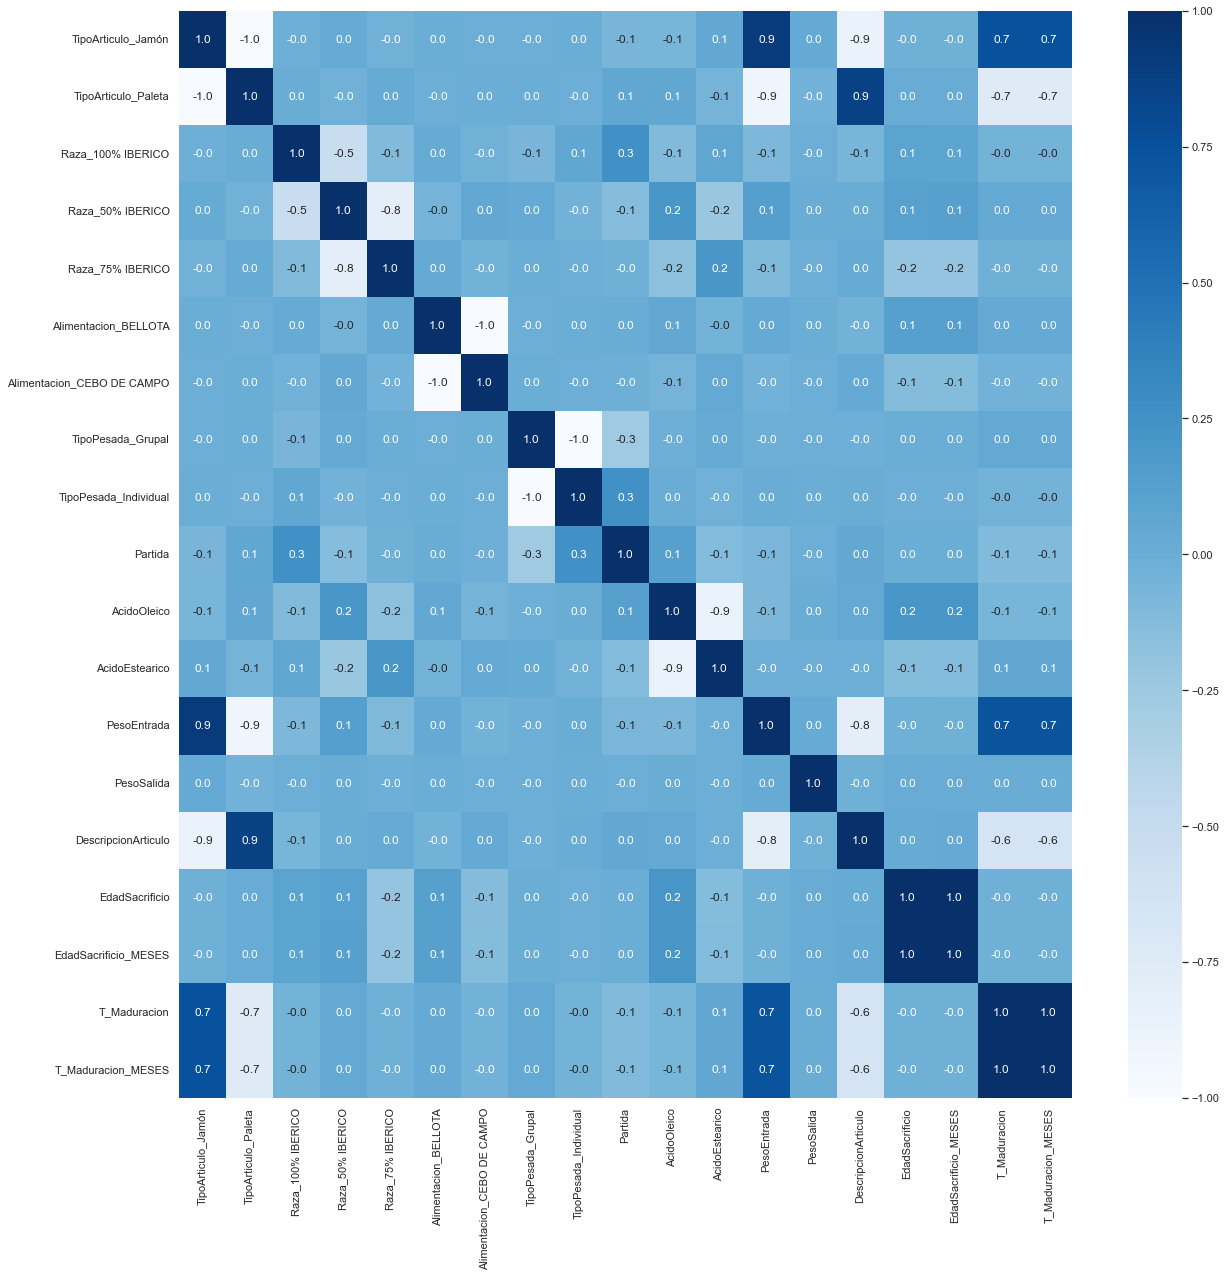

In [31]:
correlation_matrix = (datos_OneH).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')

In [ ]:
datos_OneH.info()

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 20))
axes = axes.flat
columnas_numeric = datos_OneH.select_dtypes(include=['float64','int64','int32']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos_OneH,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

# Ajuste modelo

### División de datos en train y test

In [36]:
x = datos_OneH[['PesoEntrada','AcidoOleico','AcidoEstearico','TipoArticulo_Jamón','TipoArticulo_Paleta']]
y = datos_OneH['T_Maduracion_MESES']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,random_state=1234,shuffle=True)

## Logistic Regresion

In [37]:
# Entrenamos el modelo
modeloLR = LogisticRegression(max_iter=200)
modeloLR.fit(x_train,y_train)

#Predecimos sobre el dataset de test
y_pred = modeloLR.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Precision: {:.3f}'.format(accuracy*100))

Precision: 12.255


## Modelo regresión

In [ ]:
x_train = sm.add_constant(x_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=x_train,)
modelo = modelo.fit()
print(modelo.summary())


## Regresión Lineal metodo 1

In [ ]:
# División de los datos en train y test
# ==============================================================================
x2 = datos_OneH[['PesoEntrada']]
#x2_train=np.array(x2)
y2 = datos_OneH['T_Maduracion_MESES']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2.values.reshape(-1,1),y2.values.reshape(-1,1),train_size = 0.8, random_state = 1234,shuffle = True)

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(x2_train.reshape(-1,1), y2_train)

In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(x2.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(x2, y2))